In [1]:
# TSF GRIP APRIL'21
# TASK 1 : PREDICTION USING SUPERVISED ML
# Predicting the percentage of a student based on no. of study hours.
# INTERN NAME : ANDRIYA TIWARY 

In [2]:
%config IPCompleter.greedy=True  #to enable intellisense in jupyter notebook

In [3]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_excel('C:\\Users\\Andriya Tiwary\\Desktop\\student_scores.xlsx')
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
x=dataset.iloc[:,0].values      #assigning independent variable(Hours) to a variable x
y=dataset.iloc[:,1].values      #assigning dependent variable(Scores) to a variable y

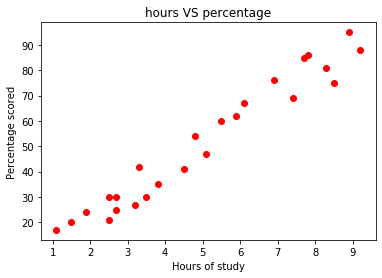

In [6]:
# visulaising hours-scores relation

plt.scatter(x,y,color='red')                    #to mark the real scores which will be scattered points in graph
plt.title('hours VS percentage')                #naming the plot
plt.xlabel('Hours of study')                    #naming x axis
plt.ylabel('Percentage scored')                 #naming y axis
plt.show()                                      #to mark the end of plot & we are ready for o/p now.

In [7]:
#splitting into train & test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
#fitting Simple Linear Regression to training set

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
x_train=x_train.reshape(-1,1)             #this is done as for x_train got value error:"expected 2D array,instead got 1D array"
regressor.fit(x_train,y_train)   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#predicting the test set results

x_test=x_test.reshape(-1,1)
y_pred=regressor.predict(x_test)
y_pred                           #now compare y_pred(model predicted score) to y_test(real score)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [10]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [11]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


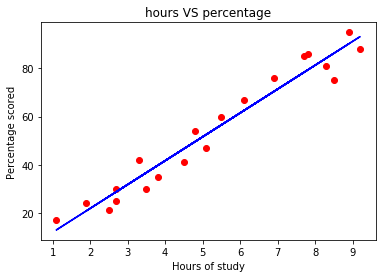

In [12]:
#visualising training set results

plt.scatter(x_train,y_train,color='red') 
plt.plot(x_train,regressor.predict(x_train),color='blue')       #to plot regression line
                                                        #here y_pred is not taken as y co-ordiante parameter cos 
                                                           #it gives predication for x test but here we are plotting for x train
plt.title('hours VS percentage')                
plt.xlabel('Hours of study')                    
plt.ylabel('Percentage scored')                 
plt.show()                 

In [13]:
#now the red points will be changed to test set, regression line will be kept same cuz its trained using training set(original data)

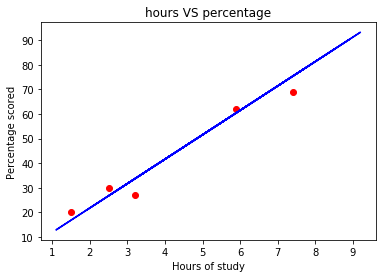

In [14]:
# visualising test set results

plt.scatter(x_test,y_test,color='red') 
plt.plot(x_train,regressor.predict(x_train),color='blue') 
plt.title('hours VS percentage')                
plt.xlabel('Hours of study')                    
plt.ylabel('Percentage scored')                 
plt.show()                 

In [15]:
# predicting for a given hour

y_pred1=regressor.predict([[8.3]])
y_pred1

array([84.27660883])

In [16]:
y_pred2=regressor.predict([[6.9]])
y_pred2

array([70.40168976])

In [17]:
# evaluating model performance through MAE (metric to measure goodness of fit)

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
